In [210]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [211]:
df = pd.read_csv('Final_data.csv')
df_no_log = pd.read_csv('out.csv')

# Data Analysis

In [212]:
print(df_no_log[['PEG', 'Market Cap']].describe())

                PEG    Market Cap
count  1.804000e+03  1.837000e+03
mean  -5.639339e+06  1.631090e+09
std    2.034680e+08  2.262082e+09
min   -4.352230e+09  1.273966e+07
25%   -4.113175e+01  3.586827e+08
50%   -9.203966e-03  9.234869e+08
75%    3.175365e+01  2.200249e+09
max    3.870829e+09  5.213639e+10


## Checking outlier

In [213]:
fig = px.box(
    data_frame=df_no_log,
    x=["Market Cap"],
    title="Distribution of Market Capitalization"
)
fig.update_layout(xaxis_title="Market Capitalization")
fig.show()

The dataset is right-skewed because of some outliers on the right side of the distribution. But it is not heavily skewed, so there is no need to remove.

In [214]:
fig = px.box(
    data_frame=df_no_log,
    x=["PEG"],
    title="Distribution of Price/Earnings-to-Growth"
)
fig.update_layout(xaxis_title="PEG")
fig.show()

Price/Earnings-to-Growth is perfectly centered around zero

# Model

## Feature Scaling

In [215]:
# df = df.fillna(0)
# df['PEG'] = df['PEG'].apply(lambda x: np.log(x) if x > 0 else (-np.log(-x) if x < 0 else 0))
# df['Market Cap'] = df['Market Cap'].apply(lambda x: np.log(x) if x > 0 else(-np.log(-x) if x < 0 else 0))

## Model

In [216]:
kmeans = KMeans(n_clusters = 9, random_state = 42)
kmeans.fit(df[['PEG','Market Cap']])
df['Cluster'] = kmeans.predict(df[['PEG','Market Cap']])
print(df)


     Ticker       PEG  Market Cap  Cluster Stock Style Box
0      FLWS  4.558316   20.221569        6      Small Core
1      SRCE -7.175842   20.962696        1      Small Core
2      TSVT  0.805642   19.079673        0     Small Value
3     TWOUQ  6.697148   16.482134        6     Small Value
4      SCWO -3.672502   18.834407        3     Small Value
...     ...       ...         ...      ...             ...
1745    ZUO  3.458929   21.077243        4      Small Core
1746   ZURA  1.690996   19.367633        0             NaN
1747    ZWS  3.868356   22.339846        4    Small Growth
1748   ZYME  1.023755   20.203447        0      Small Core
1749   ZYXI -4.363376   19.474748        3      Small Core

[1750 rows x 5 columns]


In [217]:
df['Cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_
print("Clustrer Centers", centers)

Clustrer Centers [[  1.04252814  19.24307574]
 [ -4.87466528  21.42677949]
 [  5.69518292  21.45390259]
 [ -3.53878168  19.59858646]
 [  3.05679313  21.42902354]
 [-21.01951892  20.5855837 ]
 [  3.90903094  19.8459462 ]
 [ 20.16138     19.65901243]
 [ -1.7786558   21.20471676]]


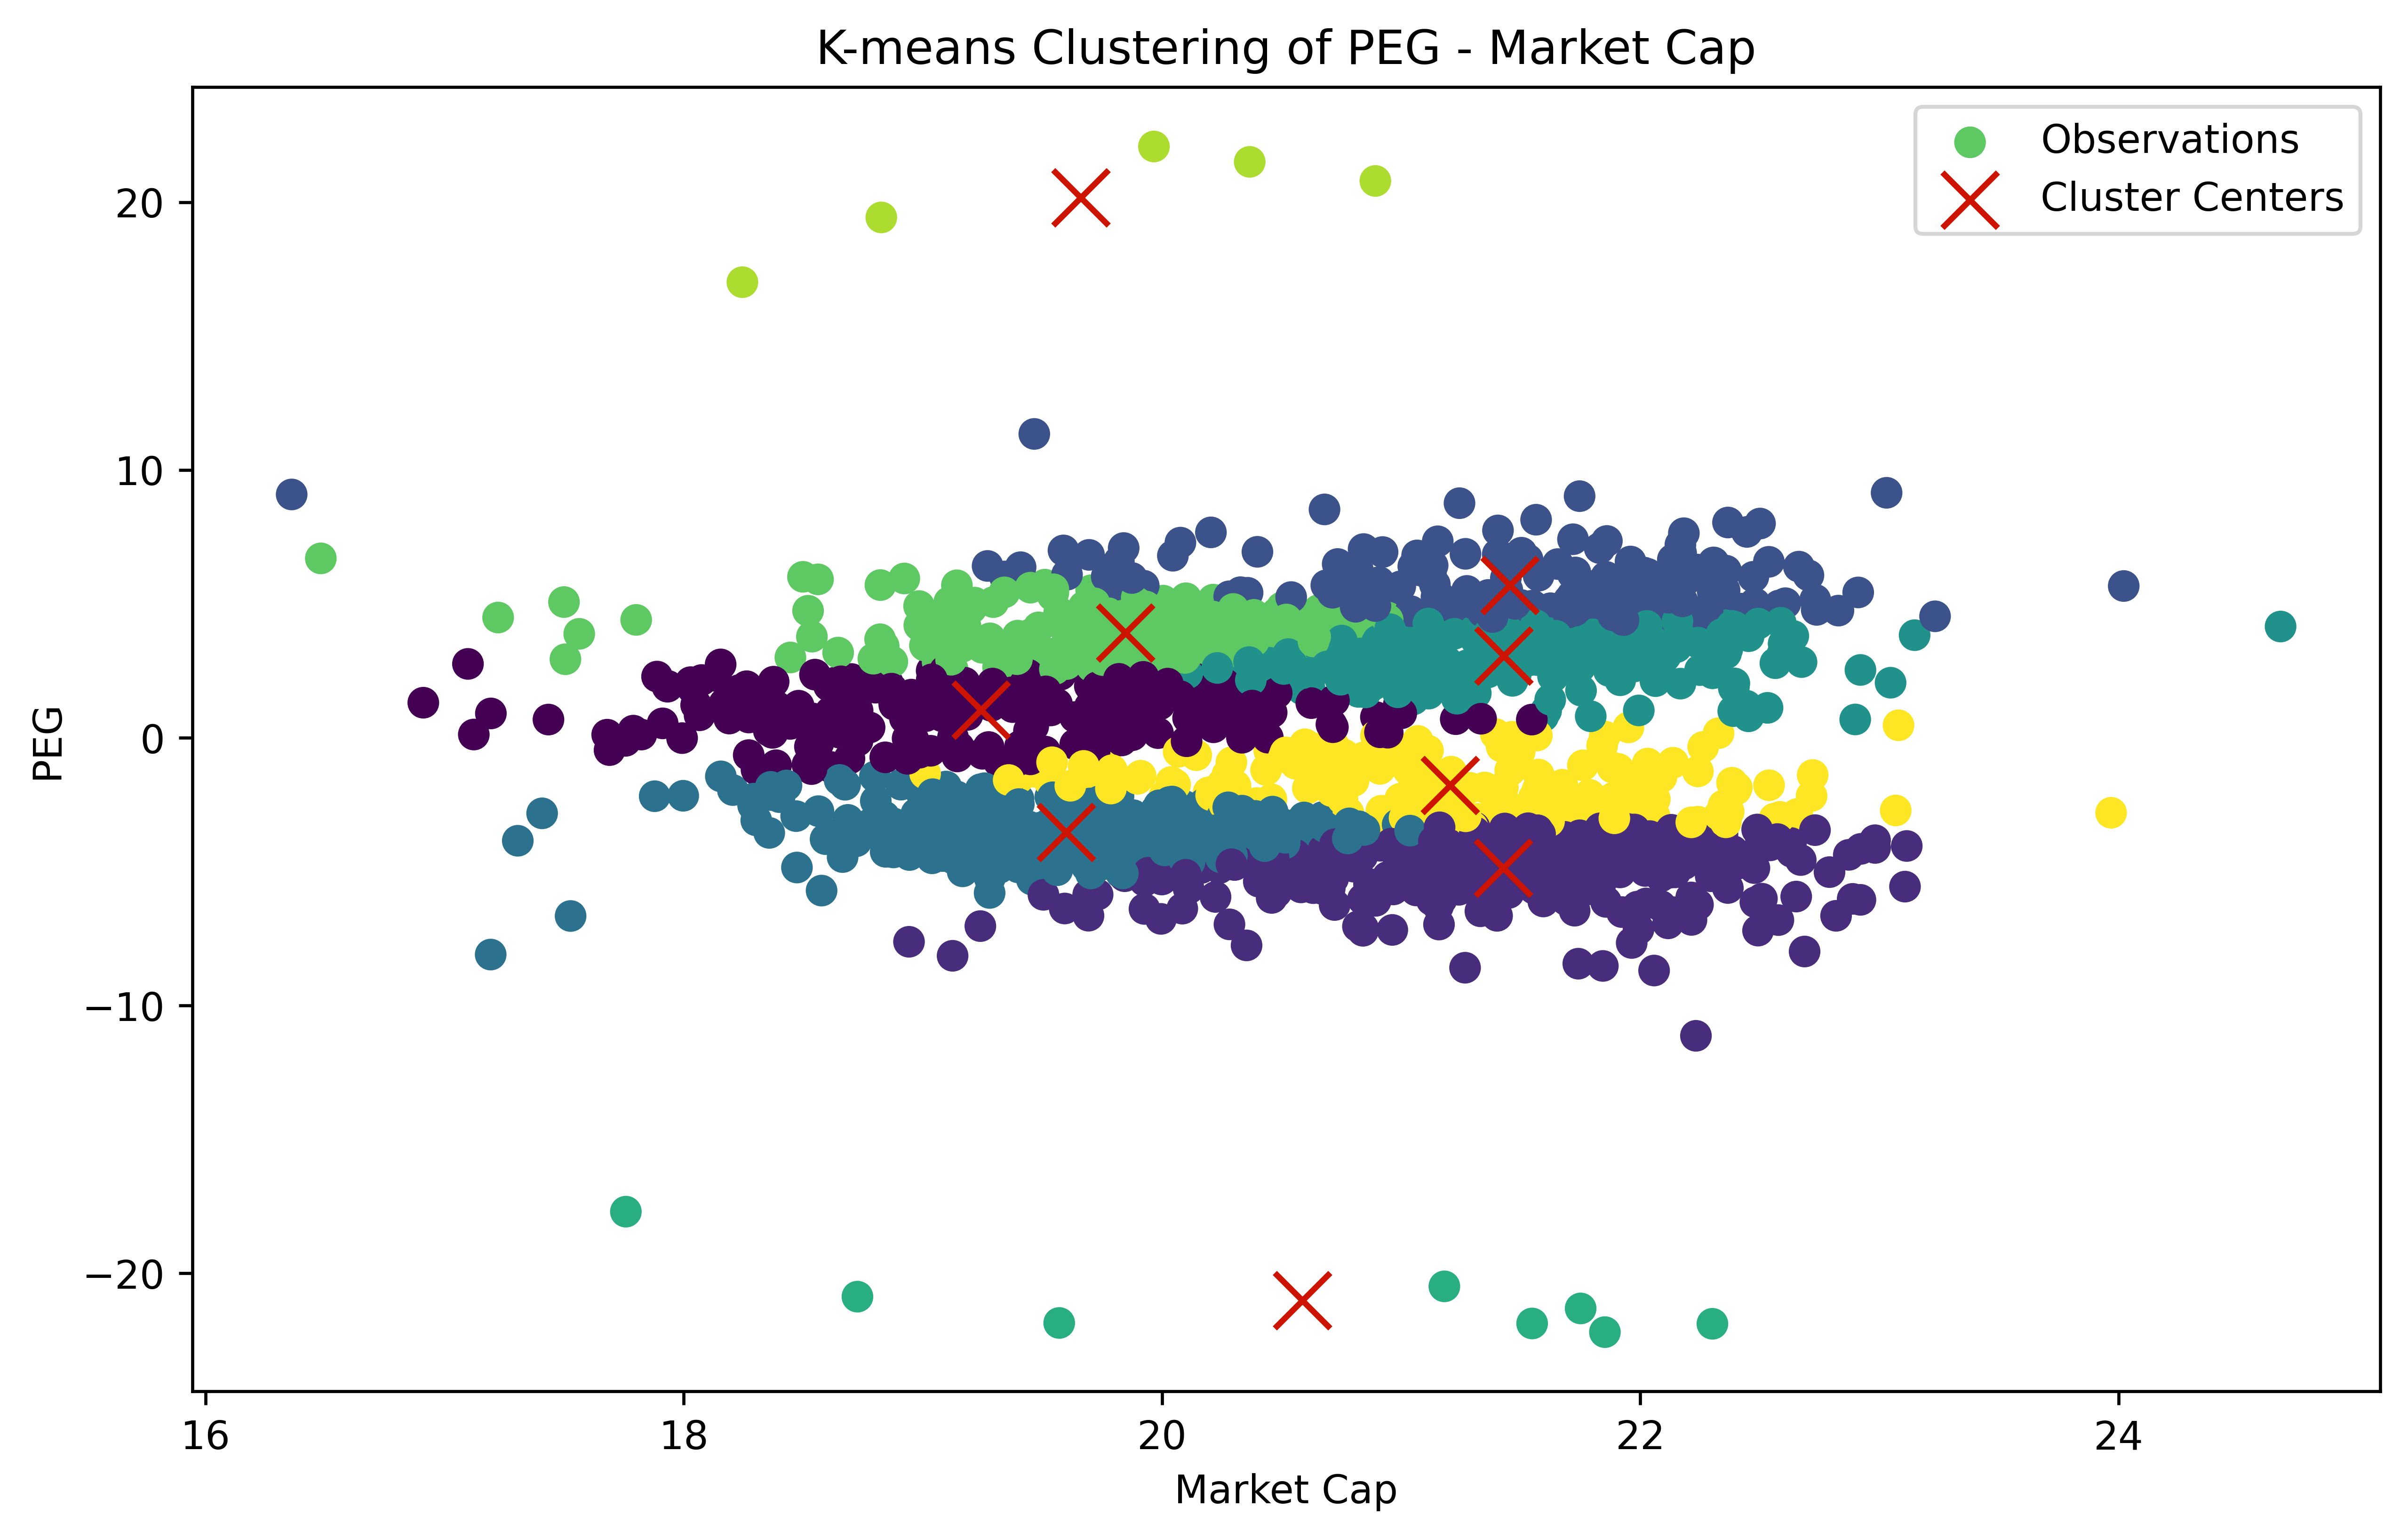

In [222]:
plt.figure(dpi=600, figsize=(10, 6))
plt.scatter(df['Market Cap'], df['PEG'], c=df['Cluster'], cmap='viridis', marker='o', s=50, label='Observations')
plt.scatter(centers[:, 1], centers[:, 0], c='#CC1400', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Market Cap')
plt.ylabel('PEG')
plt.title('K-means Clustering of PEG - Market Cap')
plt.legend()
plt.savefig('K-means Clustering of PEG - Market Cap')
plt.show()


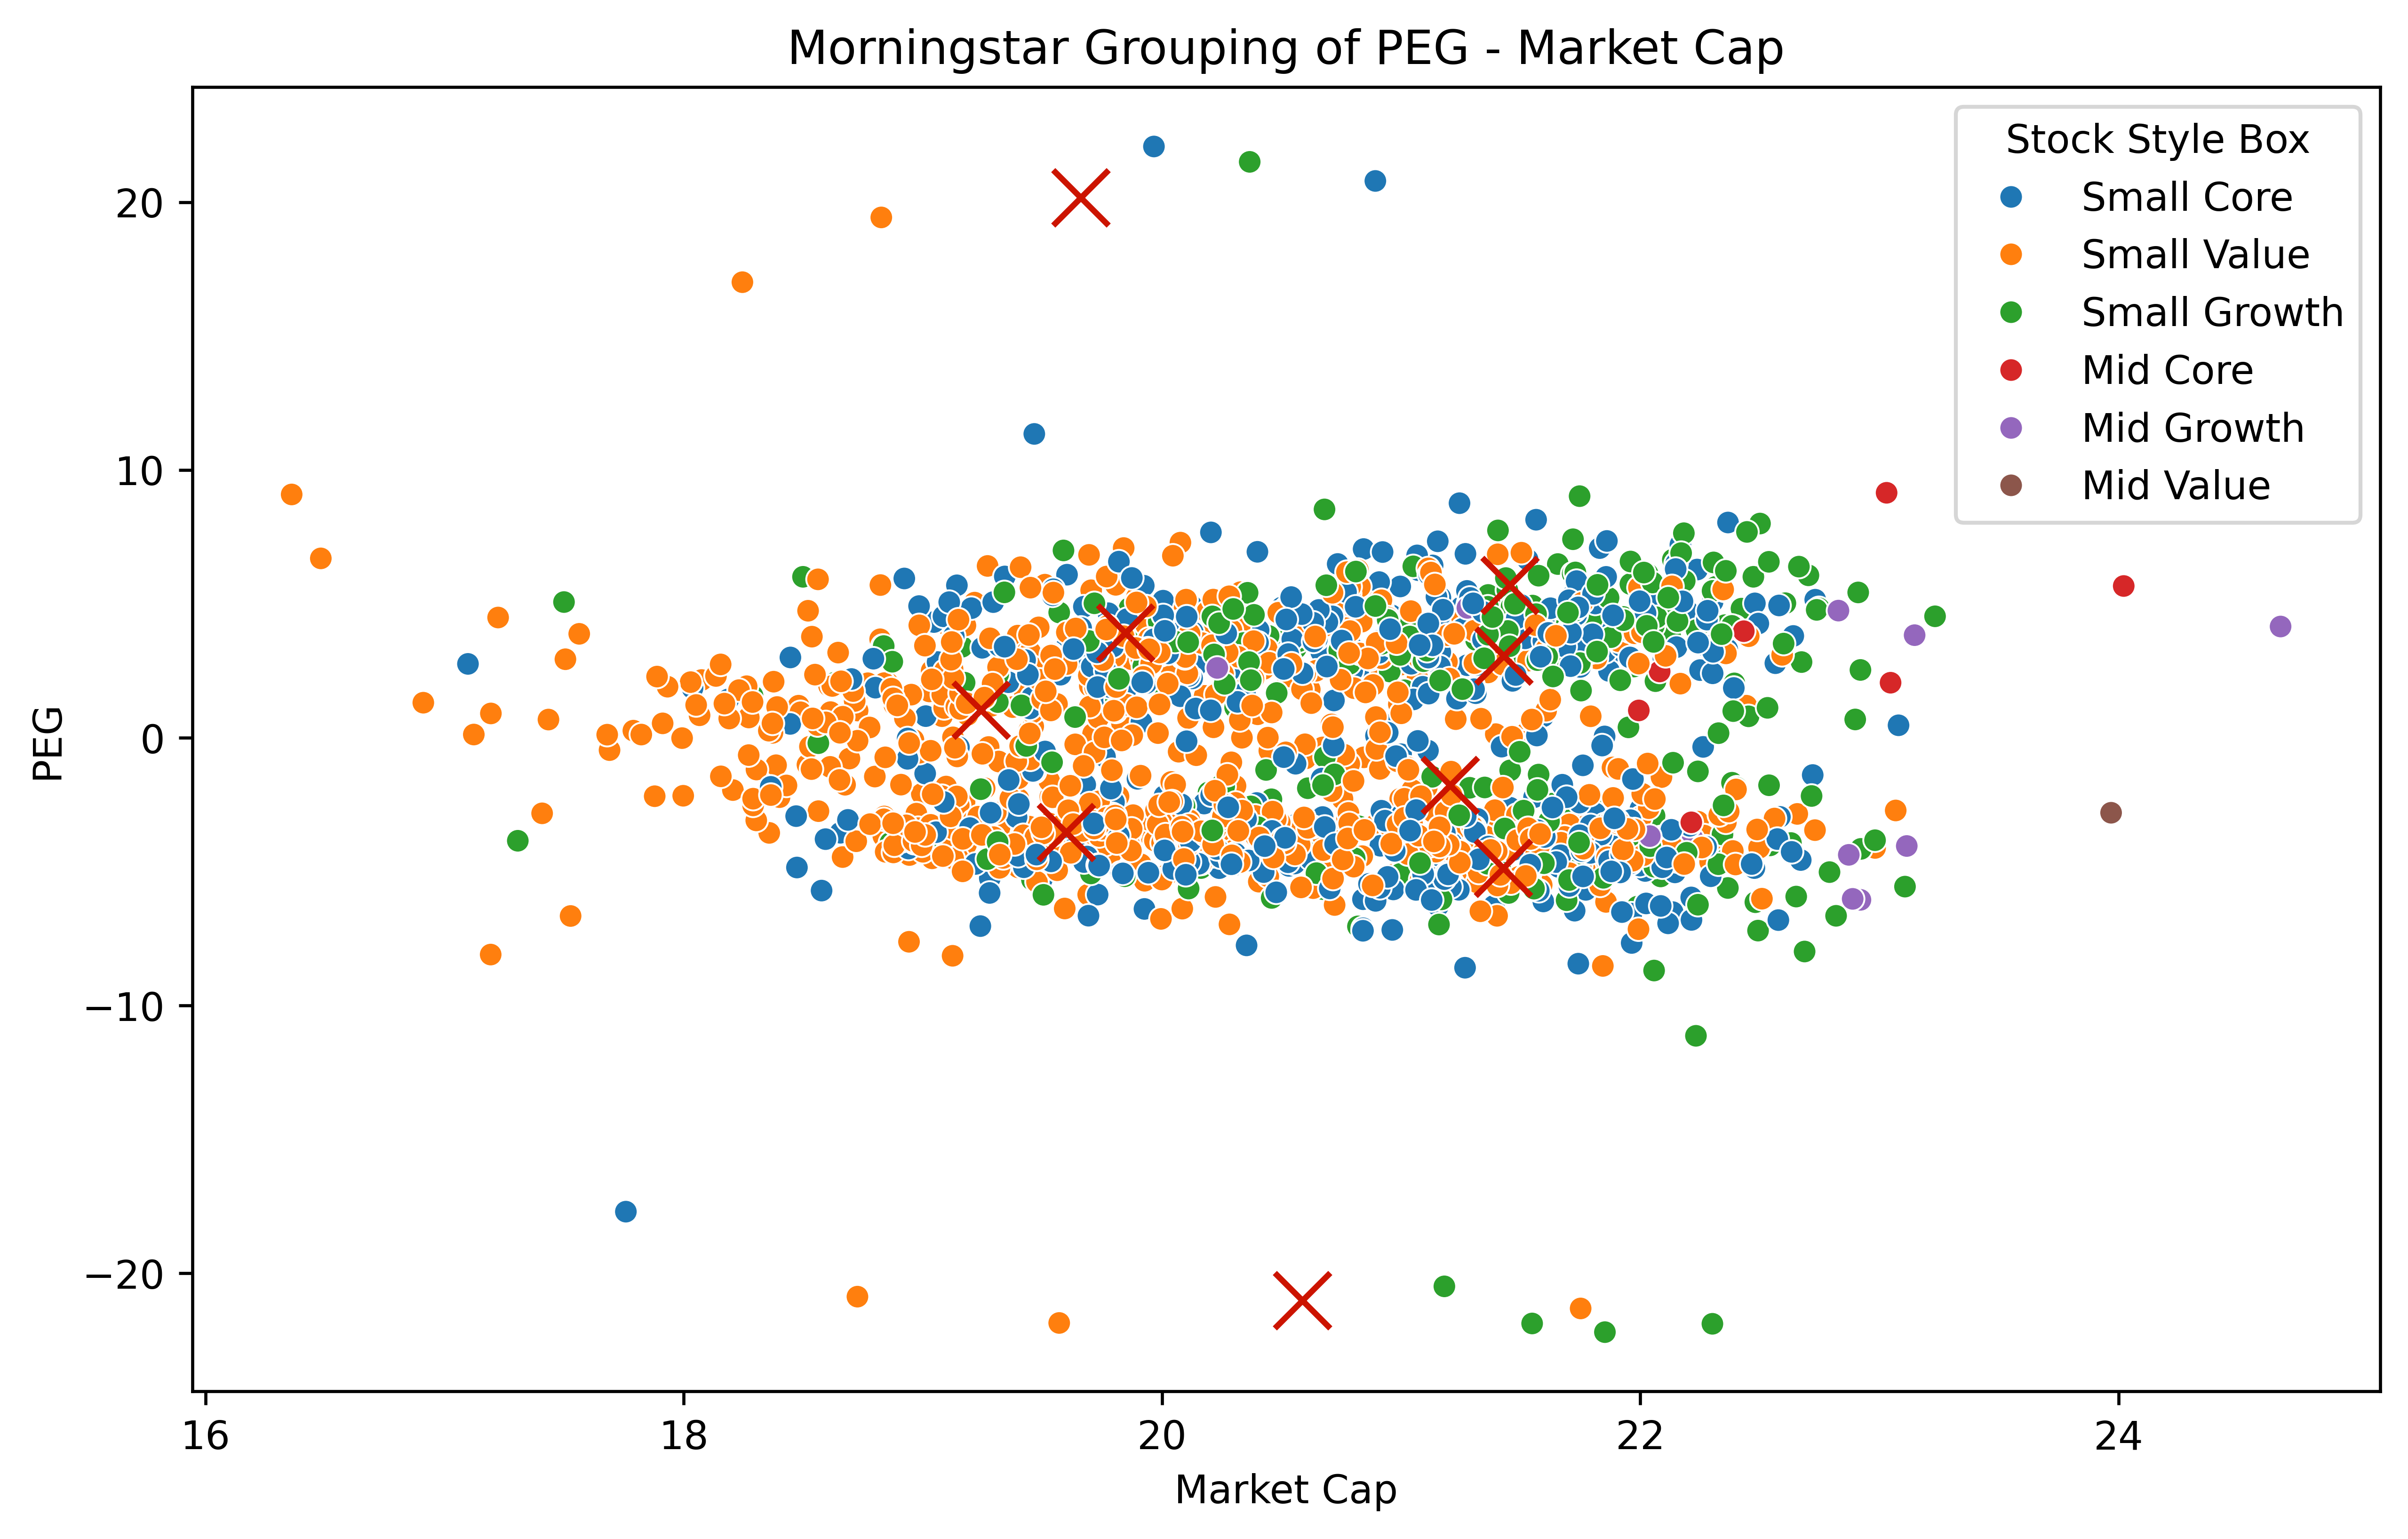

In [223]:
plt.figure(dpi=600, figsize=(10, 6))
sns.scatterplot(data=df, x='Market Cap', y='PEG', hue='Stock Style Box')
plt.scatter(centers[:, 1], centers[:, 0], c='#CC1400', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Market Cap')
plt.ylabel('PEG')
plt.title('Morningstar Grouping of PEG - Market Cap')
plt.savefig('Morningstar Grouping of PEG - Market Cap.png')
plt.show()